# Display and process OME-Zarr images with pyClesperanto

In [1]:
import pyclesperanto as cle
import napari, os
from ome_zarr.utils import download
import matplotlib.pyplot as plt

We need first a local Zarr image in order to load it into Napari and process it with pyclesperanto

In [2]:
local_path = "./zaar_test"
zarr_path = os.path.join(local_path, "6001240.zarr")

if not os.path.exists(zarr_path):
    print("Downloading data")
    remote_url = "https://uk1s3.embassy.ebi.ac.uk/idr/zarr/v0.4/idr0062A/6001240.zarr"
    download(input_path=remote_url,output_dir=local_path) # zarr dataset needs to be local

downloading...
   6001240.zarr
   6001240.zarr/labels
   6001240.zarr/labels/0
to ./zaar_test
[########################################] | 100% Completed | 1.05 sms
[########################################] | 100% Completed | 822.31 ms
[########################################] | 100% Completed | 911.05 ms
[########################################] | 100% Completed | 100.75 ms
[########################################] | 100% Completed | 100.74 ms
[########################################] | 100% Completed | 201.36 ms
[########################################] | 100% Completed | 201.72 ms


Next, using the Napari-OME-Zarr plugin, we can load the Zarr image into a Napari instance. More info on the plugin here: https://www.napari-hub.org/plugins/napari-ome-zarr

/home/strigaud/Libraries/miniforge3/envs/zarr-napari-env/lib/python3.10/site-packages/napari/utils/colormaps/colormap.py:435: UserWarning: color_dict did not provide a default color. Missing keys will be transparent. To provide a default color, use the key `None`, or provide a defaultdict instance.
  warn(


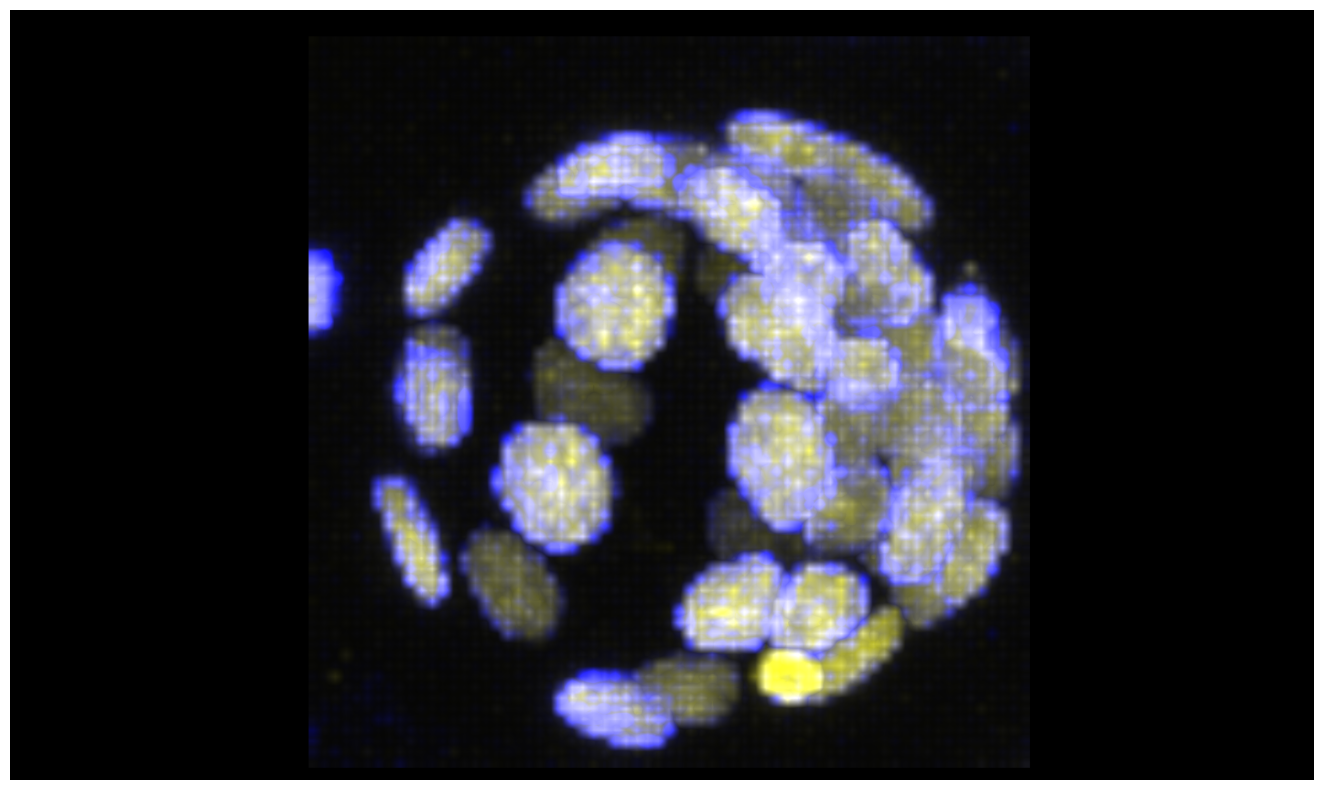

In [3]:
viewer = napari.Viewer()
viewer.open(zarr_path, plugin="napari-ome-zarr")
viewer.dims.ndisplay = 3
screenshot_zarr = viewer.screenshot()

# Display the screenshot in the Jupyter Notebook
fig, axs = plt.subplots(1,1, figsize=(20,10))
axs.imshow(screenshot_zarr)
axs.axis('off')  # Hide the axes
plt.show()

Once loaded into Napari, the data structure used for the image is a `MultiScaleData` which is an list of dask array of the image at different resolution. If provided to pyClesperanto, the highest resolution will be loaded and processed. The output returned will be a pyclesperanto GPU Array that can be process more or pull back to the CPU for display.

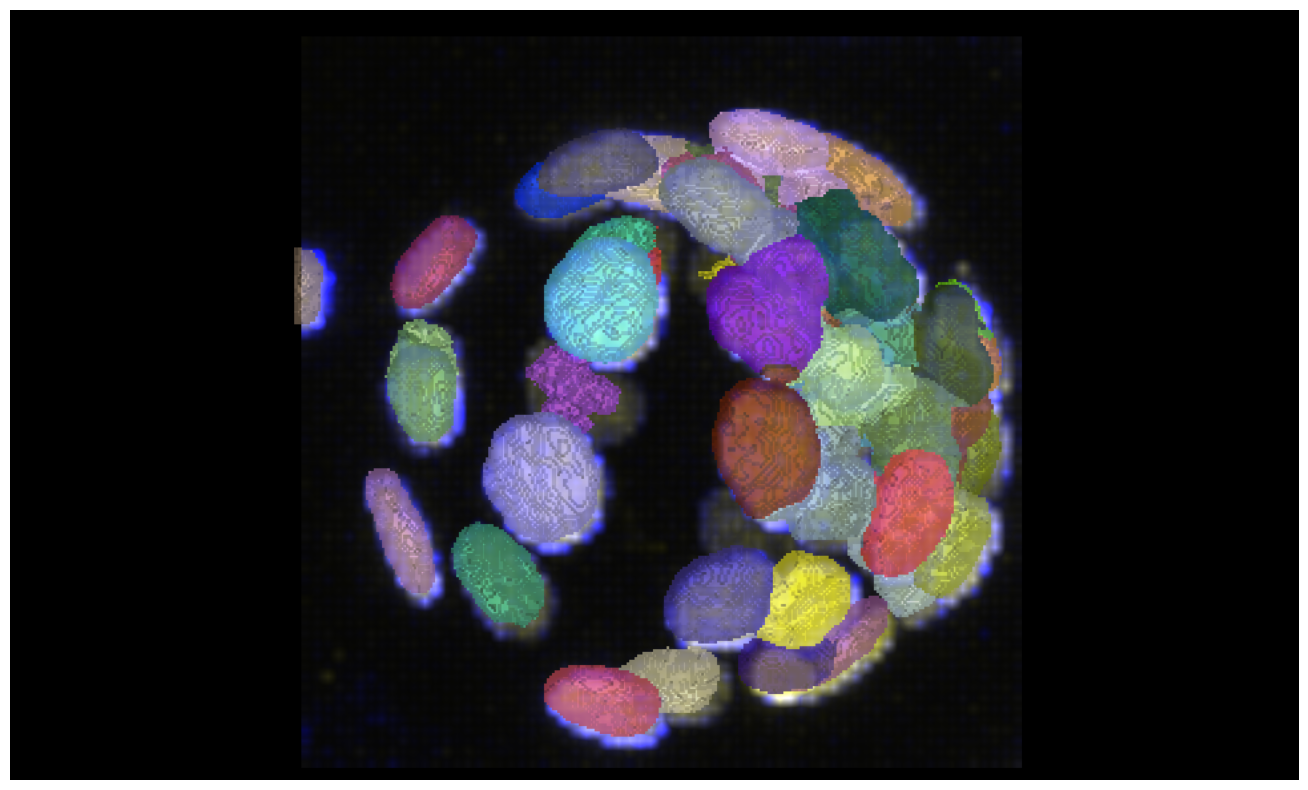

In [4]:
# some clesperanto processing, always on the highest resolution data
pycle_labels = cle.voronoi_otsu_labeling(viewer.layers["Dapi"].data, outline_sigma=1, spot_sigma=5)
viewer.add_labels(pycle_labels, scale=viewer.layers["Dapi"].scale)
screenshot_pycle = viewer.screenshot()

# Display the screenshot in the Jupyter Notebook
fig, axs = plt.subplots(1,1, figsize=(20,10))
axs.imshow(screenshot_pycle)
axs.axis('off')  # Hide the axes
plt.show()

pyclesperanto arrays does not have scale metadata. We reused the scale information from the original layer to display the output correctly.

## Selecting an other resolution

By default, pyclesperanto will take the highest resolution possible, but you can by-pass this behaviour by providing directly the dask.array corresponding to the resolution you want to process.

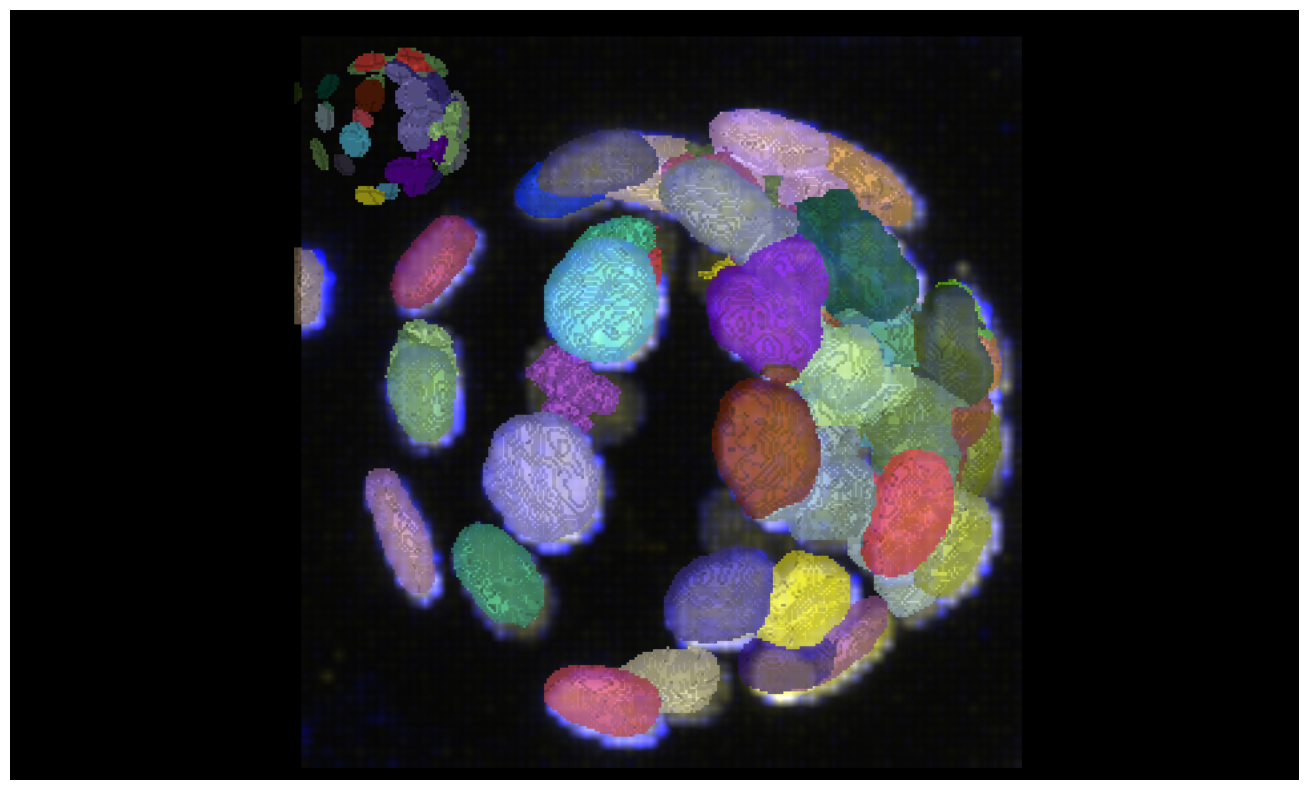

In [5]:
# This time we process the lower resolution data
pycle_labels = cle.voronoi_otsu_labeling(viewer.layers["Dapi"].data[-1], outline_sigma=1, spot_sigma=5)
viewer.add_labels(pycle_labels, scale=viewer.layers["Dapi"].scale)
screenshot_pycle = viewer.screenshot()

# Display the screenshot in the Jupyter Notebook
fig, axs = plt.subplots(1,1, figsize=(20,10))
axs.imshow(screenshot_pycle)
axs.axis('off')  # Hide the axes
plt.show()